Importo librerie e monto il drive:

In [27]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Scarico due immagini destinate ad essere incollate:

In [28]:
im1 = cv.imread('/content/drive/MyDrive/digital signal/consegna_assignments/sx.png', flags = cv.IMREAD_GRAYSCALE)
im2 = cv.imread('/content/drive/MyDrive/digital signal/consegna_assignments/dx.png', flags = cv.IMREAD_GRAYSCALE)

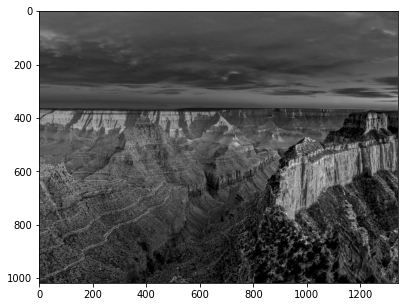

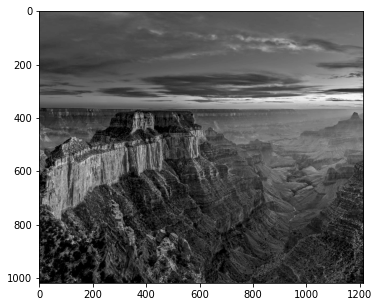

In [29]:
plt.imshow(im1, cmap='gray'); plt.show()
plt.imshow(im2, cmap='gray')

Utilizzo l'algoritmo **SIFT** per la **keypoint detection** e **keypoint description** ed eseguo il matching:

In [30]:
sift = cv.SIFT_create()

(kps1, features1) = sift.detectAndCompute(im1, None)
(kps2, features2) = sift.detectAndCompute(im2, None)

In [31]:
bf = cv.BFMatcher.create(crossCheck = True)
matches = bf.match(features1, features2)
print('Ho', len(matches), 'match')

Ho 5331 match


Visualizzo i primi 4000 match:

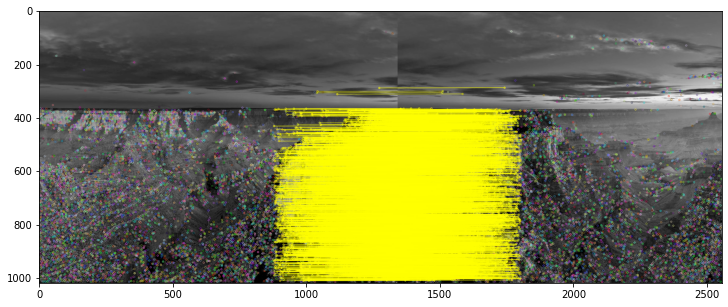

In [32]:
matches = sorted(matches, key = lambda x:x.distance)
res = cv.drawMatches(im1, kps1, im2, kps2, matches[:4000], None, matchColor = [255,255,0])
plt.imshow(res); plt.show()

**Warping**: faccio il warping grazie alla matrice di omografia tra le due immagine, trovata con la funzione myHomography:

In [33]:
def myHomography(kps1,kps2,matches):
  
  id_1 = []
  id_2 = []
  for i in range(0,len(matches)):
    pos_1 = matches[i].queryIdx
    pos_2 = matches[i].trainIdx

    id_1.append(kps1[pos_1].pt)
    id_2.append(kps2[pos_2].pt)
  
  id_1_array = np.asarray(id_1)
  id_2_array = np.asarray(id_2)

  H, mask = cv.findHomography(id_2_array, id_1_array, method=cv.RANSAC)
  return H

H = myHomography(kps1, kps2, matches)
H

array([[ 1.00000741e+00,  4.29266570e-06,  8.72992030e+02],
       [-1.74348219e-05,  9.99982933e-01,  1.01502320e+00],
       [ 8.76436954e-09, -6.60566075e-09,  1.00000000e+00]])

Il parametro add_length dovrà essere minore della larghezza dell'immagine di sinistra. Idealmente (per evitare dilatazione dell'immagine di destra) dev'essere = larghezza immagine di sinistra - larghezza della parte in comune tra le due immagini

In [34]:
def myWarp(im, H, add_length):
  contenitore = cv.warpPerspective(im, H, dsize=(int(im.shape[1]+add_length), im.shape[0]))
  return contenitore

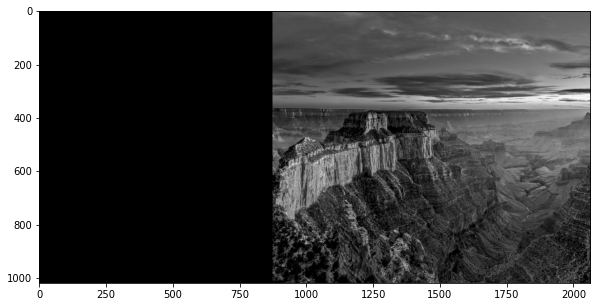

In [35]:
#Visivamente mi sembra che il parametro add_length sia circa 850
contenitore = myWarp(im2, H, 850)
plt.imshow(contenitore, cmap = 'gray'); plt.show()

**Collage**:

In [36]:
def myCollage(im_base,im_new):
    porzione = im_new[0:im_base.shape[0], im_base.shape[1]+1:]
    #è la parte della seconda immagineche non è in comune con la prima 
    
    collage = np.concatenate((im_base, porzione), axis=1)
    return collage

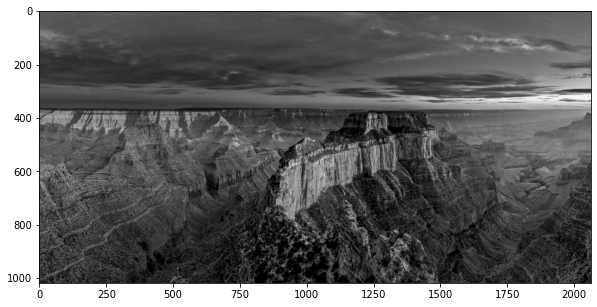

In [37]:
panorama=myCollage(im1,contenitore)
plt.imshow(panorama, cmap='gray'); plt.show()